In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/all subjects.csv")

In [ ]:
print(data.columns)
print(data.shape)

Index(['rank', 'country', 'Documents', 'Citable documents', 'Citations',
       'Self-Citations', 'Citations per Document', 'H index'],
      dtype='object')
(242, 8)


In [ ]:
X = data.iloc[:, [3,4]].values

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2.2314686057739712e+17]
[2.2314686057739712e+17, 4.8974707684189576e+16]
[2.2314686057739712e+17, 4.8974707684189576e+16, 1.1067722162472512e+16]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2.2314686057739712e+17, 4.8974707684189576e+16, 1.1067722162472512e+16, 4772442495784441.0]
[2.2314686057739712e+17, 4.8974707684189576e+16, 1.1067722162472512e+16, 4772442495784441.0, 2119526753145821.5]
[2.2314686057739712e+17, 4.8974707684189576e+16, 1.1067722162472512e+16, 4772442495784441.0, 2119526753145821.5, 1196346488474349.8]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2.2314686057739712e+17, 4.8974707684189576e+16, 1.1067722162472512e+16, 4772442495784441.0, 2119526753145821.5, 1196346488474349.8, 845191748328420.1]
[2.2314686057739712e+17, 4.8974707684189576e+16, 1.1067722162472512e+16, 4772442495784441.0, 2119526753145821.5, 1196346488474349.8, 845191748328420.1, 527426999665687.56]
[2.2314686057739712e+17, 4.8974707684189576e+16, 1.1067722162472512e+16, 4772442495784441.0, 2119526753145821.5, 1196346488474349.8, 845191748328420.1, 527426999665687.56, 338494960213410.56]
[2.2314686057739712e+17, 4.8974707684189576e+16, 1.1067722162472512e+16, 4772442495784441.0, 2119526753145821.5, 1196346488474349.8, 845191748328420.1, 527426999665687.56, 338494960213410.56, 257358769074991.53]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


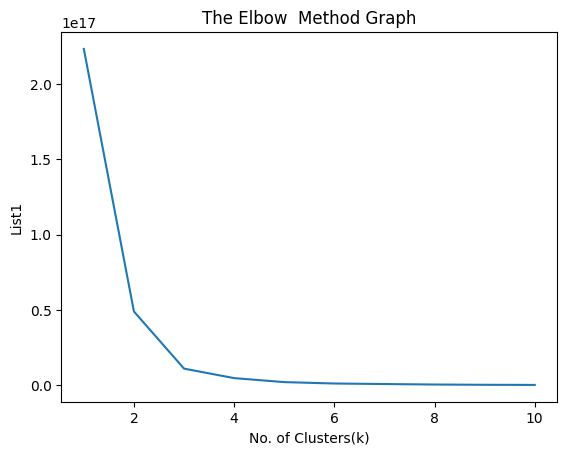

In [ ]:
from sklearn.cluster import KMeans
list1 = []

for i in range(1, 11):
    Kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    Kmeans.fit(X)
    list1.append(Kmeans.inertia_)
    print(list1)
plt.plot(range(1, 11), list1)
plt.title('The Elbow  Method Graph')
plt.xlabel('No. of Clusters(k)')
plt.ylabel('List1')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit(X)

from sklearn import metrics
from sklearn.metrics import pairwise_distances

labels = y_kmeans.labels_
metrics.silhouette_score(X, labels, metric='euclidean')

0.8701529270337284

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
train_data, test_data = train_test_split(X, test_size = 0.25)
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)
#print(y_kmeans)
x_train, x_test, y_train, y_test = train_test_split(X, y_kmeans, test_size = 0.25)
#print(test_data)
kmeans1 = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
print(cross_val_score(kmeans1, x_train, y_train, cv=5, scoring='accuracy').mean())

0.016516516516516516


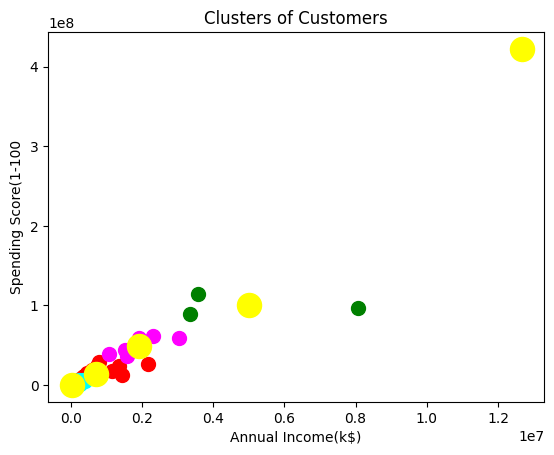

In [ ]:
#6 Visualising the clusters

y_kmeans = kmeans.fit_predict(X)
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='magenta', label ='Cluster 5')
#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.show()

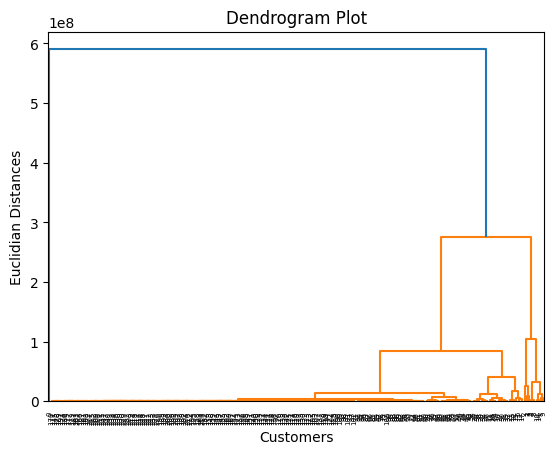

In [ ]:
import scipy.cluster.hierarchy as shc
dendro = shc.dendrogram(shc.linkage(X, method="ward"))
plt.title("Dendrogram Plot")
plt.ylabel("Euclidian Distances")
plt.xlabel("Customers")
plt.show()

In [ ]:
#training the hierarchical model on dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

y_kmeans = hc.fit(X)
labels = y_kmeans.labels_
metrics.silhouette_score(X, labels, metric='euclidean')

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


0.8646674363493783

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


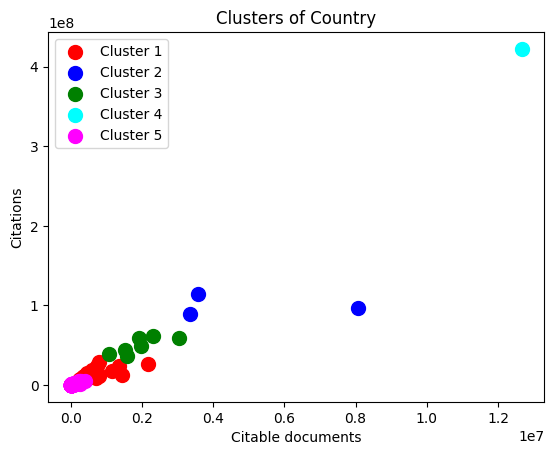

In [ ]:
#visualizing the clusters
y_kmeans = hc.fit_predict(X)
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='magenta', label ='Cluster 5')
#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.

plt.title('Clusters of Country')
plt.xlabel('Citable documents')
plt.ylabel('Citations')
plt.legend()
plt.show()